In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Administrator\Downloads\image\cardioActivities.csv")
df = df.drop(["Route Name", "Friend's Tagged"], axis=1)
df["Average Heart Rate (bpm)"] = df["Average Heart Rate (bpm)"].fillna(df["Average Heart Rate (bpm)"].mean())
df["Average Heart Rate (bpm)"].isna().value_counts()
import datetime as dt
df = df.drop("Activity Id", axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df["hour"] = df["Date"].dt.hour
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df["Type"] = df["Type"].astype("category")

In [2]:
def chuyen_gio_sang_phut(gio_str):
    if gio_str.count(":") == 2:
        gio, phut, giay = map(int, gio_str.split(":"))
        return gio * 60 + phut + giay/60
    else:
        phut, giay = map(int, gio_str.split(":"))
        return phut + giay / 60
    

In [3]:
df["Phut_tap"] = df["Duration"].apply(chuyen_gio_sang_phut)

In [4]:
df.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,GPX File,hour,year,month,day,Phut_tap
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,2018-11-11-140512.gpx,14,2018,11,11,58.666667
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,2018-11-09-150235.gpx,15,2018,11,9,74.200000
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,2018-11-04-160500.gpx,16,2018,11,4,75.266667
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,2018-11-01-140358.gpx,14,2018,11,1,74.416667
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,2018-10-27-170136.gpx,17,2018,10,27,72.833333


In [5]:
df = df.drop("Duration", axis=1)

In [7]:
df.dtypes

Date                        datetime64[ns]
Type                              category
Distance (km)                      float64
Average Pace                        object
Average Speed (km/h)               float64
Calories Burned                    float64
Climb (m)                            int64
Average Heart Rate (bpm)           float64
Notes                               object
GPX File                            object
hour                                 int32
year                                 int32
month                                int32
day                                  int32
Phut_tap                           float64
dtype: object

In [13]:
df.head()

,Type,Distance (km),Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,hour,year,month,day,Phut_tap
0,Running,10.44,5:37,10.68,774.0,130,159.0,Blank,14,2018,11,11,58.666667
1,Running,12.84,5:47,10.39,954.0,168,159.0,Blank,15,2018,11,9,74.200000
2,Running,13.01,5:47,10.37,967.0,171,155.0,Blank,16,2018,11,4,75.266667
3,Running,12.98,5:44,10.47,960.0,169,158.0,Blank,14,2018,11,1,74.416667
4,Running,13.02,5:36,10.73,967.0,170,154.0,Blank,17,2018,10,27,72.833333


In [22]:
colums = {
    "Distance (km)": "km",
    "Average Pace": "pace",
    "Average Speed (km/h)": "speed",
    "Average Heart Rate (bpm)": "nhip_tim"
}

df.rename(columns=colums, inplace=True)

In [10]:
df = df.drop("GPX File", axis=1)

In [12]:
df = df.drop("Date", axis=1)

In [8]:
df["Notes"] = df["Notes"].fillna("Blank")

In [15]:
# Có những kiểu tập luyện nào ở đây: 
df["Type"].value_counts()
#Bơi, đạp, chạy.

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

In [23]:
df.head()

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,Notes,hour,year,month,day,Phut_tap
0,Running,10.44,5:37,10.68,774.0,130,159.0,Blank,14,2018,11,11,58.666667
1,Running,12.84,5:47,10.39,954.0,168,159.0,Blank,15,2018,11,9,74.200000
2,Running,13.01,5:47,10.37,967.0,171,155.0,Blank,16,2018,11,4,75.266667
3,Running,12.98,5:44,10.47,960.0,169,158.0,Blank,14,2018,11,1,74.416667
4,Running,13.02,5:36,10.73,967.0,170,154.0,Blank,17,2018,10,27,72.833333


In [26]:
#Quãng đường di chuyển trung bình đối với mỗi kiểu luyện tập là bao nhiêu: 
df.groupby("Type")[["km", "speed", "Calories Burned", "Climb (m)", "nhip_tim", "Phut_tap"]].mean()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1504\2298053065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Type")[["km", "speed", "Calories Burned", "Climb (m)", "nhip_tim", "Phut_tap"]].mean()


,km,speed,Calories Burned,Climb (m),nhip_tim,Phut_tap
Type,,,,,,
Cycling,23.468276,19.125172,558.482759,240.551724,133.635468,75.845402
Other,17.225000,16.100000,1119.500000,210.500000,85.500000,64.408333
Running,11.382353,11.056296,14656.621576,124.788671,144.408652,62.223747
Walking,1.858333,5.549444,155300.777778,19.388889,143.530612,25.990741


In [27]:
#Có thể thấy lượng calories trung bình tiêu thụ theo thú tự: đi bộ > chạy bộ > đạp xe. 
#Có thể thấy cùng một quảng đường, đi bộ tiêu thụ nhiều calo hơn chạy bộ và đạp xe.  

In [28]:
df.head(2)

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,Notes,hour,year,month,day,Phut_tap
0,Running,10.44,5:37,10.68,774.0,130,159.0,Blank,14,2018,11,11,58.666667
1,Running,12.84,5:47,10.39,954.0,168,159.0,Blank,15,2018,11,9,74.200000


In [31]:
df.dtypes

Type               category
km                  float64
pace                 object
speed               float64
Calories Burned     float64
Climb (m)             int64
nhip_tim            float64
Notes                object
hour                  int32
year                  int32
month                 int32
day                   int32
Phut_tap            float64
dtype: object

In [29]:
# Lượng calories tiêu thụ theo thời gian luyện tập như thế nào. 
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df["Calories Burned"].max()

4072685.0

<Axes: xlabel='Phut_tap', ylabel='nhip_tim'>

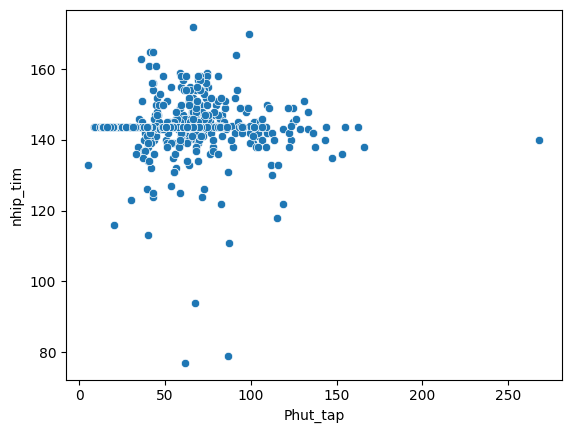

In [38]:
sns.scatterplot(data=df, x = "Phut_tap", y = "nhip_tim")


In [47]:
#Giả định: Tập đi bộ là bộ môn hiệu quả nhất: Lượng tiêu thụ calo / thời gian tập là lớn nhất. 
#Thêm cột: Lượng calo tiêu thụ / phút tập. 

df["calo/h"] = df["Calories Burned"] / df["Phut_tap"]

In [49]:
df.rename(columns={
    "calo/h": "calo/ph"
}, inplace=True)

In [50]:
df.head(2)

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,Notes,hour,year,month,day,Phut_tap,calo/ph
0,Running,10.44,5:37,10.68,774.0,130,159.0,Blank,14,2018,11,11,58.666667,13.193182
1,Running,12.84,5:47,10.39,954.0,168,159.0,Blank,15,2018,11,9,74.200000,12.857143


In [62]:
df1 = df.groupby("Type")["Calories Burned"].mean()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1504\3849843915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby("Type")["Calories Burned"].mean()


In [63]:
df1

Type
Cycling       558.482759
Other        1119.500000
Running     14656.621576
Walking    155300.777778
Name: Calories Burned, dtype: float64

<Axes: xlabel='Type', ylabel='Calories Burned'>

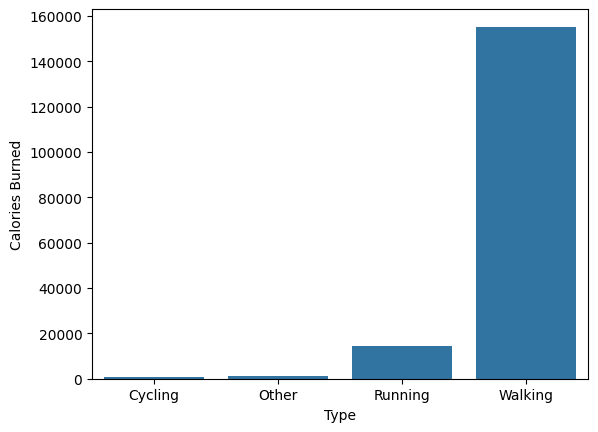

In [108]:
df1 = pd.DataFrame(df1)
sns.barplot(df1, x = "Type", y = "Calories Burned")

Insight: Có thể thấy lượng calo tiêu thụ / phút của việc đi bộ lớn hơn rất nhiều so với chạy bộ. Vì vậy
tôi có thể kết luận cùng một thời gian luyện tập, đi bộ đem lại lợi ích với sức khoẻ tốt hơn so với chạy bộ
và đap xe. 
Recommendation: Khuyến nghị nên chọn đi bộ vì những lợi ích về sức khoẻ của nó. 

<Axes: xlabel='Phut_tap', ylabel='Count'>

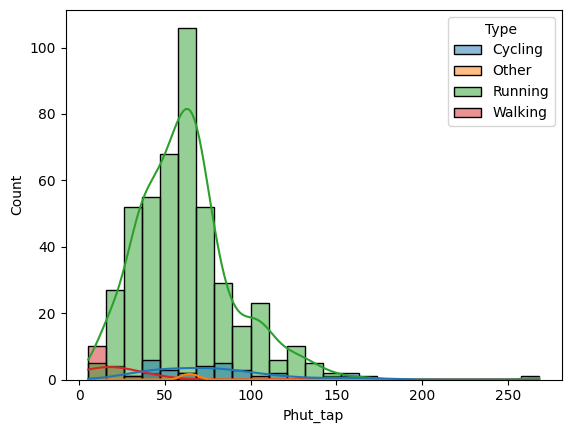

In [46]:
sns.histplot(data=df, x = "Phut_tap", bins=25, kde="True",
             hue="Type")

In [ ]:
# Xem thời điểm tập trong ngày có ảnh hưởng gì đến hiệu quả tập luyện hay không? 
# Hay, tập luyện vào giờ nào trong ngày thì hiệu quả. 

In [66]:
df.head()

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,Notes,hour,year,month,day,Phut_tap,calo/ph
0,Running,10.44,5:37,10.68,774.0,130,159.0,Blank,14,2018,11,11,58.666667,13.193182
1,Running,12.84,5:47,10.39,954.0,168,159.0,Blank,15,2018,11,9,74.200000,12.857143
2,Running,13.01,5:47,10.37,967.0,171,155.0,Blank,16,2018,11,4,75.266667,12.847653
3,Running,12.98,5:44,10.47,960.0,169,158.0,Blank,14,2018,11,1,74.416667,12.900336
4,Running,13.02,5:36,10.73,967.0,170,154.0,Blank,17,2018,10,27,72.833333,13.276888


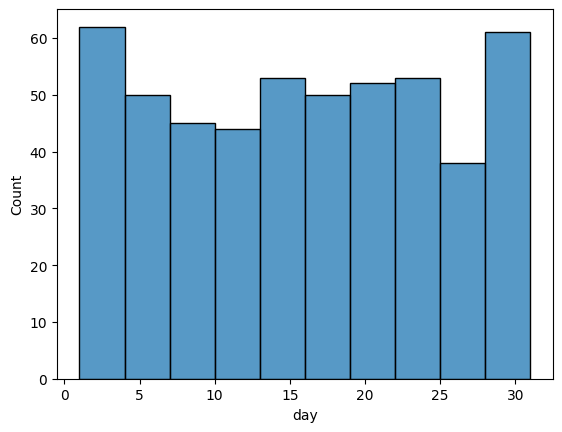

In [68]:
#Người ta hay đi tập vào ngày nào trong tháng
sns.histplot(data=df, x = "day")
plt.show()
#Cơ bản thì người ta đi tập đều trong thàng. 

<Axes: xlabel='hour', ylabel='Count'>

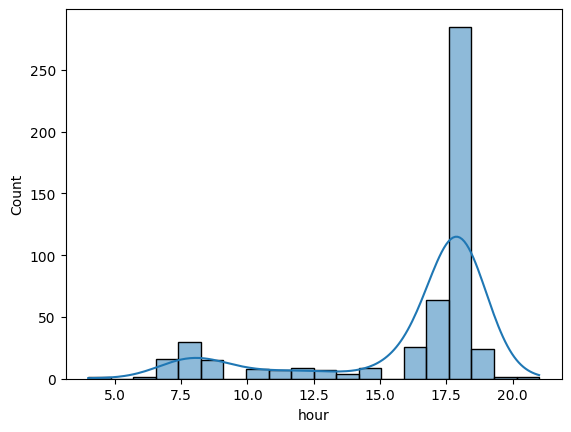

In [73]:
sns.histplot(data=df, x = "hour", bins=20, kde=True)
#Thời gian tập luyện chủ yếu trong ngày là từ 5 - 6 giờ chiều. 

In [86]:
df["Calories Burned"].describe()

count    5.080000e+02
mean     1.878197e+04
std      2.186930e+05
min      4.000000e+01
25%      4.917500e+02
50%      7.280884e+02
75%      9.212500e+02
max      4.072685e+06
Name: Calories Burned, dtype: float64

In [105]:
df[df["Calories Burned"] > 3000]

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,Notes,hour,year,month,day,Phut_tap,calo/ph
503,Walking,1.57,8:41,6.91,926743.0,7,143.530612,Blank,7,2012,8,28,13.650000,67893.260073
504,Walking,1.48,12:09,4.94,942192.0,12,143.530612,Blank,12,2012,8,24,17.933333,52538.587361
505,Walking,1.49,9:14,6.49,924486.0,9,143.530612,Blank,10,2012,8,24,13.716667,67398.736330
506,Running,3.15,5:05,11.82,2288868.0,17,143.530612,Blank,8,2012,8,24,16.000000,143054.250000
507,Running,5.69,5:29,10.95,4072685.0,32,143.530612,Blank,18,2012,8,22,31.133333,130814.293362


In [121]:
#Những dữ liệu cuối này là những dữ liệu cũ, có thể có nhầm lẫn trong việc thu thập dữ liệu, vì vậy dẫn đến những giá trị bất hợp lý. 
df = df.drop(df.index[503:508])

In [122]:
df2 = df.groupby("Type")["calo/ph"].mean()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1504\2155786869.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby("Type")["calo/ph"].mean()


In [123]:
df2

Type
Cycling     7.676132
Other      17.449244
Running    12.875090
Walking     5.630173
Name: calo/ph, dtype: float64

Sau khi điều chỉnh lại, kết luận, chạy bộ là môn thể thao tiêu thụ nhiều calo nhất, sau đó đến đạp xe, sau đó là đi bộ. 
Recommedation: Nên chọn tậo chạy bộ > Đạp xe > Đi bôk. để đạt hiệu quả tập luyện cao nhất. 

In [124]:
walking = df[df["Type"] == "Walking"]

In [125]:
df.head(2)

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,hour,year,month,day,Phut_tap,calo/ph
0,Running,10.44,5:37,10.68,774.0,130,159.0,14,2018,11,11,58.666667,13.193182
1,Running,12.84,5:47,10.39,954.0,168,159.0,15,2018,11,9,74.200000,12.857143


In [116]:
df["Notes"].value_counts()

Notes
Blank                                                                  273
TomTom MySports Watch                                                  225
Very hot, up to 30+\n                                                    1
Cold and windy\n                                                         1
HOT!                                                                     1
It was not easy, as it was +29 Celcius                                   1
It was raining heavily, which was absolute fun to run that distance      1
I was feeling sick                                                       1
Name: count, dtype: int64

In [117]:
df = df.drop("Notes", axis=1)

In [118]:
df.head(2)

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,hour,year,month,day,Phut_tap,calo/ph
0,Running,10.44,5:37,10.68,774.0,130,159.0,14,2018,11,11,58.666667,13.193182
1,Running,12.84,5:47,10.39,954.0,168,159.0,15,2018,11,9,74.200000,12.857143


In [126]:
df["Calories Burned"].describe()

count     503.000000
mean      767.921080
std       357.123845
min        40.000000
25%       491.000000
50%       723.208400
75%       919.000000
max      2587.999999
Name: Calories Burned, dtype: float64

In [127]:
df[df["Calories Burned"] > 500000]

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,hour,year,month,day,Phut_tap,calo/ph


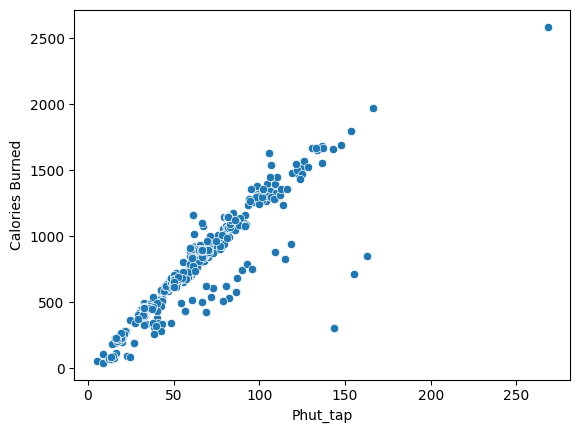

In [129]:
sns.scatterplot(data=df, x = "Phut_tap", y = "Calories Burned")
plt.show()

In [78]:
#Thời gian luyện tập trong ngày có ảnh hưởng gì đến hiệu quản tập luyện. 
#co the thấy là: càng tập nhiều thì lượng ca lo tiêu thụ cảng nhiều

Kết luận: Tập càng lâu càng tốt. 

In [ ]:
# Ngày nào trong tháng tập luyện thì hiệu quả. 
#Tháng nào trong năm tập luyện thì đem lại hiệu quả: VD: Hè có thể nóng nên tập sẽ đôt nhiều calo hơn. 

<Axes: xlabel='month', ylabel='Calories Burned'>

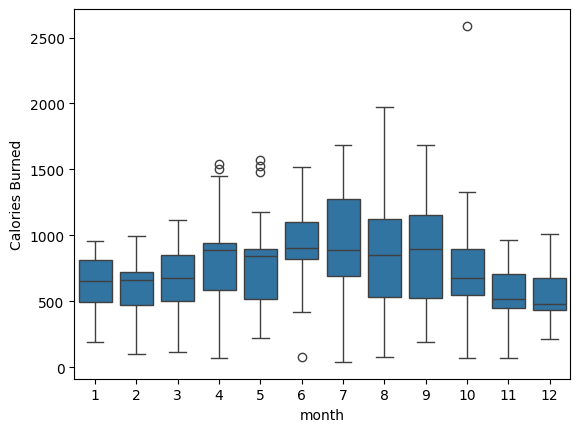

In [131]:
sns.boxplot(data=df, x = "month", y = "Calories Burned")

Có thể thấy, trong tháng 6 - 9, lượng calo tiêu thụ là nhiều hơn so với những tháng khác. > Giả định: thời tiết vào thu mát mẻ> người dân đi tập nhiều. 

Không thể kết luận là tháng nào tập hiệu quả hơn tháng nào. 

<Axes: xlabel='hour', ylabel='Calories Burned'>

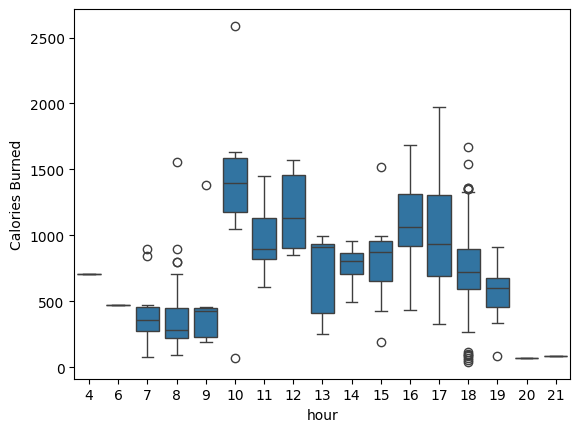

In [133]:
#giờ tập trong ngày có ảnh hưởng hay không? 
sns.boxplot(data=df, x = "hour", y = "Calories Burned")

Insight: 
- Tập buổi sáng sớm không có hiệu quả nhiều. 
- Tập vào buổi trưa, buổi chiều lượng calo tiêu thụ là cao nhất. 
Recommendation: 
- Nên tập vào buổi trưa / chiều. 
- Nếu bạn là vận động viên: Nên tập vào thời gian 10 - 12h. 
- Nếu là người đi làm thì nên tập chiều. 
- Tập buổi sáng không đem lại hiệu quả nhiều,

In [79]:
#Nhịp tim cao hay thấp có liên quan gì đến hiệu quả tập luyện hay không? 

<Axes: xlabel='nhip_tim', ylabel='Calories Burned'>

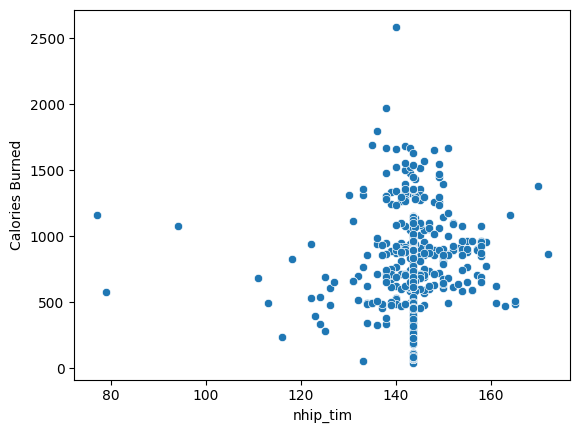

In [134]:
sns.scatterplot(data=df, x = "nhip_tim", y = "Calories Burned")

In [80]:
#Độ cao khi tập có ảnh hưởng gì đén hiệu quả tập luyện. 

In [135]:
df.head(2)

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,hour,year,month,day,Phut_tap,calo/ph
0,Running,10.44,5:37,10.68,774.0,130,159.0,14,2018,11,11,58.666667,13.193182
1,Running,12.84,5:47,10.39,954.0,168,159.0,15,2018,11,9,74.200000,12.857143


<Axes: xlabel='Climb (m)', ylabel='Calories Burned'>

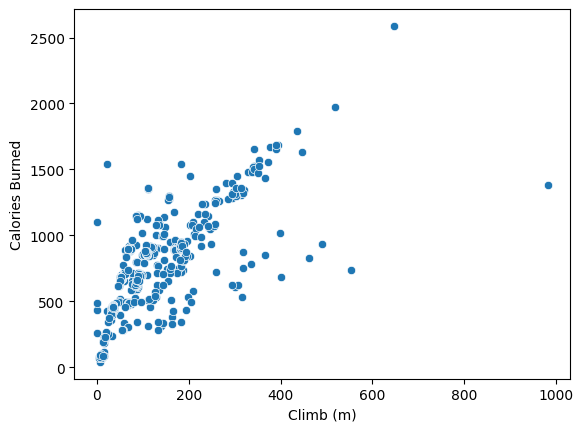

In [136]:
sns.scatterplot(data=df, x="Climb (m)", y = "Calories Burned")

Kết luận: Có thể thấy độ dốc nơi tập luyện càng lớn, hiệu quả tập luyện sẽ càng cao. 
- Vì tập nơi cao, sẽ cầng dùng nhiều sức hơn, không khí loãng hơn, ...
Recommendation: Nên chọn nơi có địa hình dốc để tập luyện để đem lại hiệu quả cao hơn. 

In [137]:
#Tập luyện bao nhiêu phút / lần tập thì là hiệu quả nhất
#Tập cảng lâu càng tốt, tuỳ theo sức mỗi người

In [138]:
#tốc độ tập như thế nào thì là hiệu quả. 
df.head()

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,hour,year,month,day,Phut_tap,calo/ph
0,Running,10.44,5:37,10.68,774.0,130,159.0,14,2018,11,11,58.666667,13.193182
1,Running,12.84,5:47,10.39,954.0,168,159.0,15,2018,11,9,74.200000,12.857143
2,Running,13.01,5:47,10.37,967.0,171,155.0,16,2018,11,4,75.266667,12.847653
3,Running,12.98,5:44,10.47,960.0,169,158.0,14,2018,11,1,74.416667,12.900336
4,Running,13.02,5:36,10.73,967.0,170,154.0,17,2018,10,27,72.833333,13.276888


In [139]:
df["pace_float"] = df["pace"].apply(chuyen_gio_sang_phut)

In [140]:
df.head()

,Type,km,pace,speed,Calories Burned,Climb (m),nhip_tim,hour,year,month,day,Phut_tap,calo/ph,pace_float
0,Running,10.44,5:37,10.68,774.0,130,159.0,14,2018,11,11,58.666667,13.193182,5.616667
1,Running,12.84,5:47,10.39,954.0,168,159.0,15,2018,11,9,74.200000,12.857143,5.783333
2,Running,13.01,5:47,10.37,967.0,171,155.0,16,2018,11,4,75.266667,12.847653,5.783333
3,Running,12.98,5:44,10.47,960.0,169,158.0,14,2018,11,1,74.416667,12.900336,5.733333
4,Running,13.02,5:36,10.73,967.0,170,154.0,17,2018,10,27,72.833333,13.276888,5.600000


<Axes: xlabel='pace_float', ylabel='Calories Burned'>

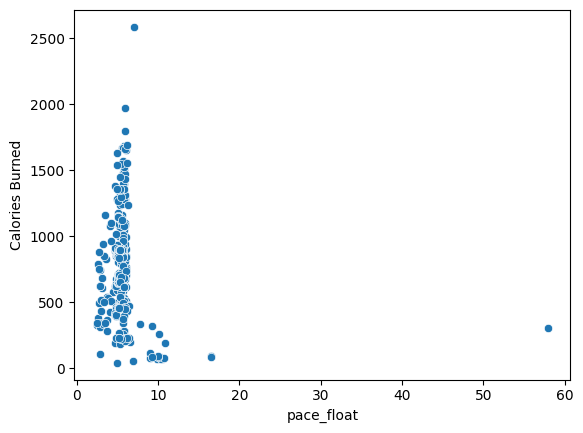

In [142]:
sns.scatterplot(data=df, x = "pace_float", y = "Calories Burned")
#Không đánh giá được.

In [84]:
#Khuyến nghị về quãng đường di chuyển, tốc độ di chuyển, thời gian di chuyển sẽ đem lại hiệu quả tập luyện vao nhất. 

<Axes: xlabel='km', ylabel='Calories Burned'>

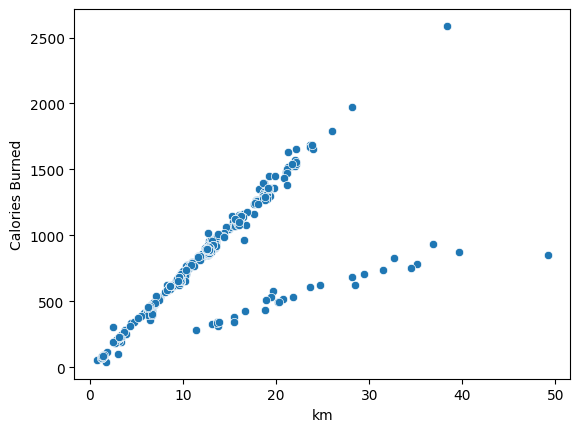

In [144]:
sns.scatterplot(data=df, x = "km", y = "Calories Burned")

Recommeadation: 
- Xếp hạng môn thể thao đem lại hiệu quả tập luyện cao: Chạy bộ, đạp xe, đi bộ. 
- Nên tập vào buổi trưa / buổi chiều để đem lại hiệu quả tập luyện cao nhất, hạn chế tập luyện vào buổi sáng. 
- Nên chọn nơi có độ dốc cao sẽ đem lại hiệu quả tập luyện cao hơn. 
- Tập càng lâu càng tốt, với tốc độ tuỳ theo sức của mỗi người. 
- nên chạy / đạp / đi bộ càng xa càng tốt. 